Text(0, 0.5, 'sacral slope')

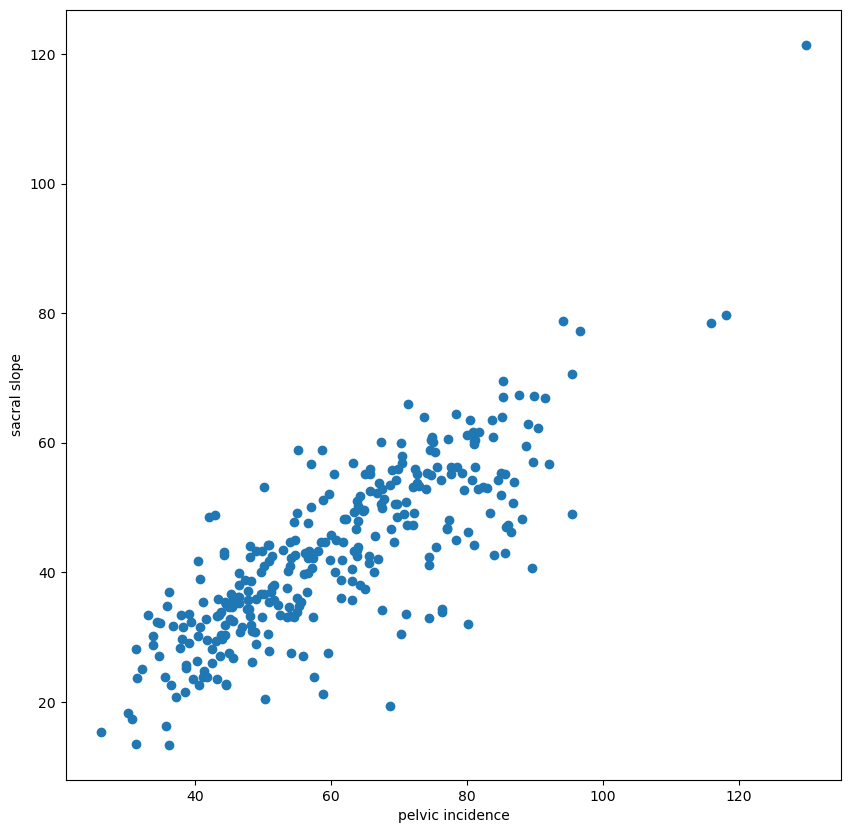

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
plt.figure(figsize=[10,10])
plt.scatter(df.pelvic_incidence,df.sacral_slope)
plt.xlabel("pelvic incidence")
plt.ylabel("sacral slope")

In [2]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
x=df.pelvic_incidence.values.reshape(-1,1)
y=df.sacral_slope.values.reshape(-1,1)
linear_reg.fit(x,y)
y_head=linear_reg.predict(x)

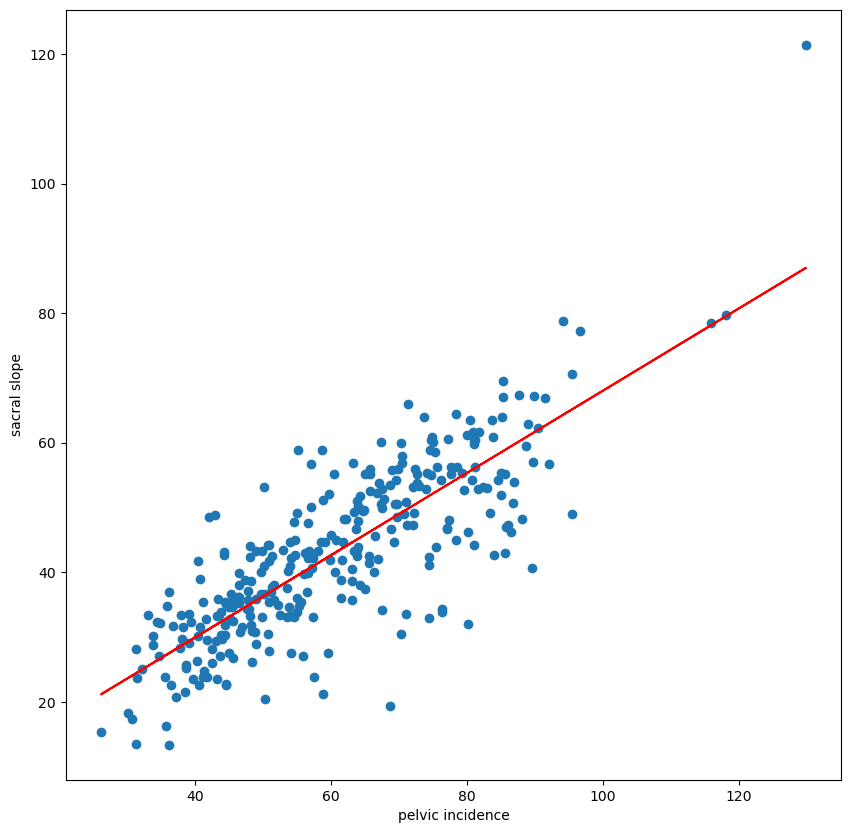

In [3]:
#%% # Plot regression line and scatter
plt.figure(figsize=[10,10])
plt.scatter(x,y)
plt.xlabel("pelvic incidence")
plt.ylabel("sacral slope")
plt.plot(x,y_head,color="red")
plt.show()

In [4]:
#%% prediction
b0=linear_reg.predict([[0]])
b1=linear_reg.coef_
print("b0: ",b0)
print("b1: ",b1)
#pelvic incidence = 80 sacral slope=?
print("Predict: ",b1*80+b0)

b0:  [[4.55916137]]
b1:  [[0.63465775]]
Predict:  [[55.33178132]]


In [5]:
#%% R^2 score
from sklearn.metrics import r2_score
print("R^2 : ",r2_score(y,y_head))

R^2 :  0.6641597839724749


In [6]:
from sklearn.linear_model import LinearRegression

x=df.iloc[:,[1,2,3,4,5]].values
y=df.pelvic_incidence.values.reshape(-1,1)

multiple_reg=LinearRegression()
multiple_reg.fit(x,y)
print("b0: ",multiple_reg.intercept_) # or print("b0: ",multiple_reg.predict(0))
print("b1,b2,b3,b4,b5 : ", multiple_reg.coef_)

b0:  [-4.42241799e-10]
b1,b2,b3,b4,b5 :  [[ 1.00000000e+00  1.88669729e-11  1.00000000e+00  6.21880508e-12
  -5.31233941e-12]]


In [7]:
y_head=multiple_reg.predict(x)
#%% R^2 score
from sklearn.metrics import r2_score
print("R^2 : ",r2_score(y,y_head))

R^2 :  1.0


In [8]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree = 4)
x_polynomial = polynomial_regression.fit_transform(x)

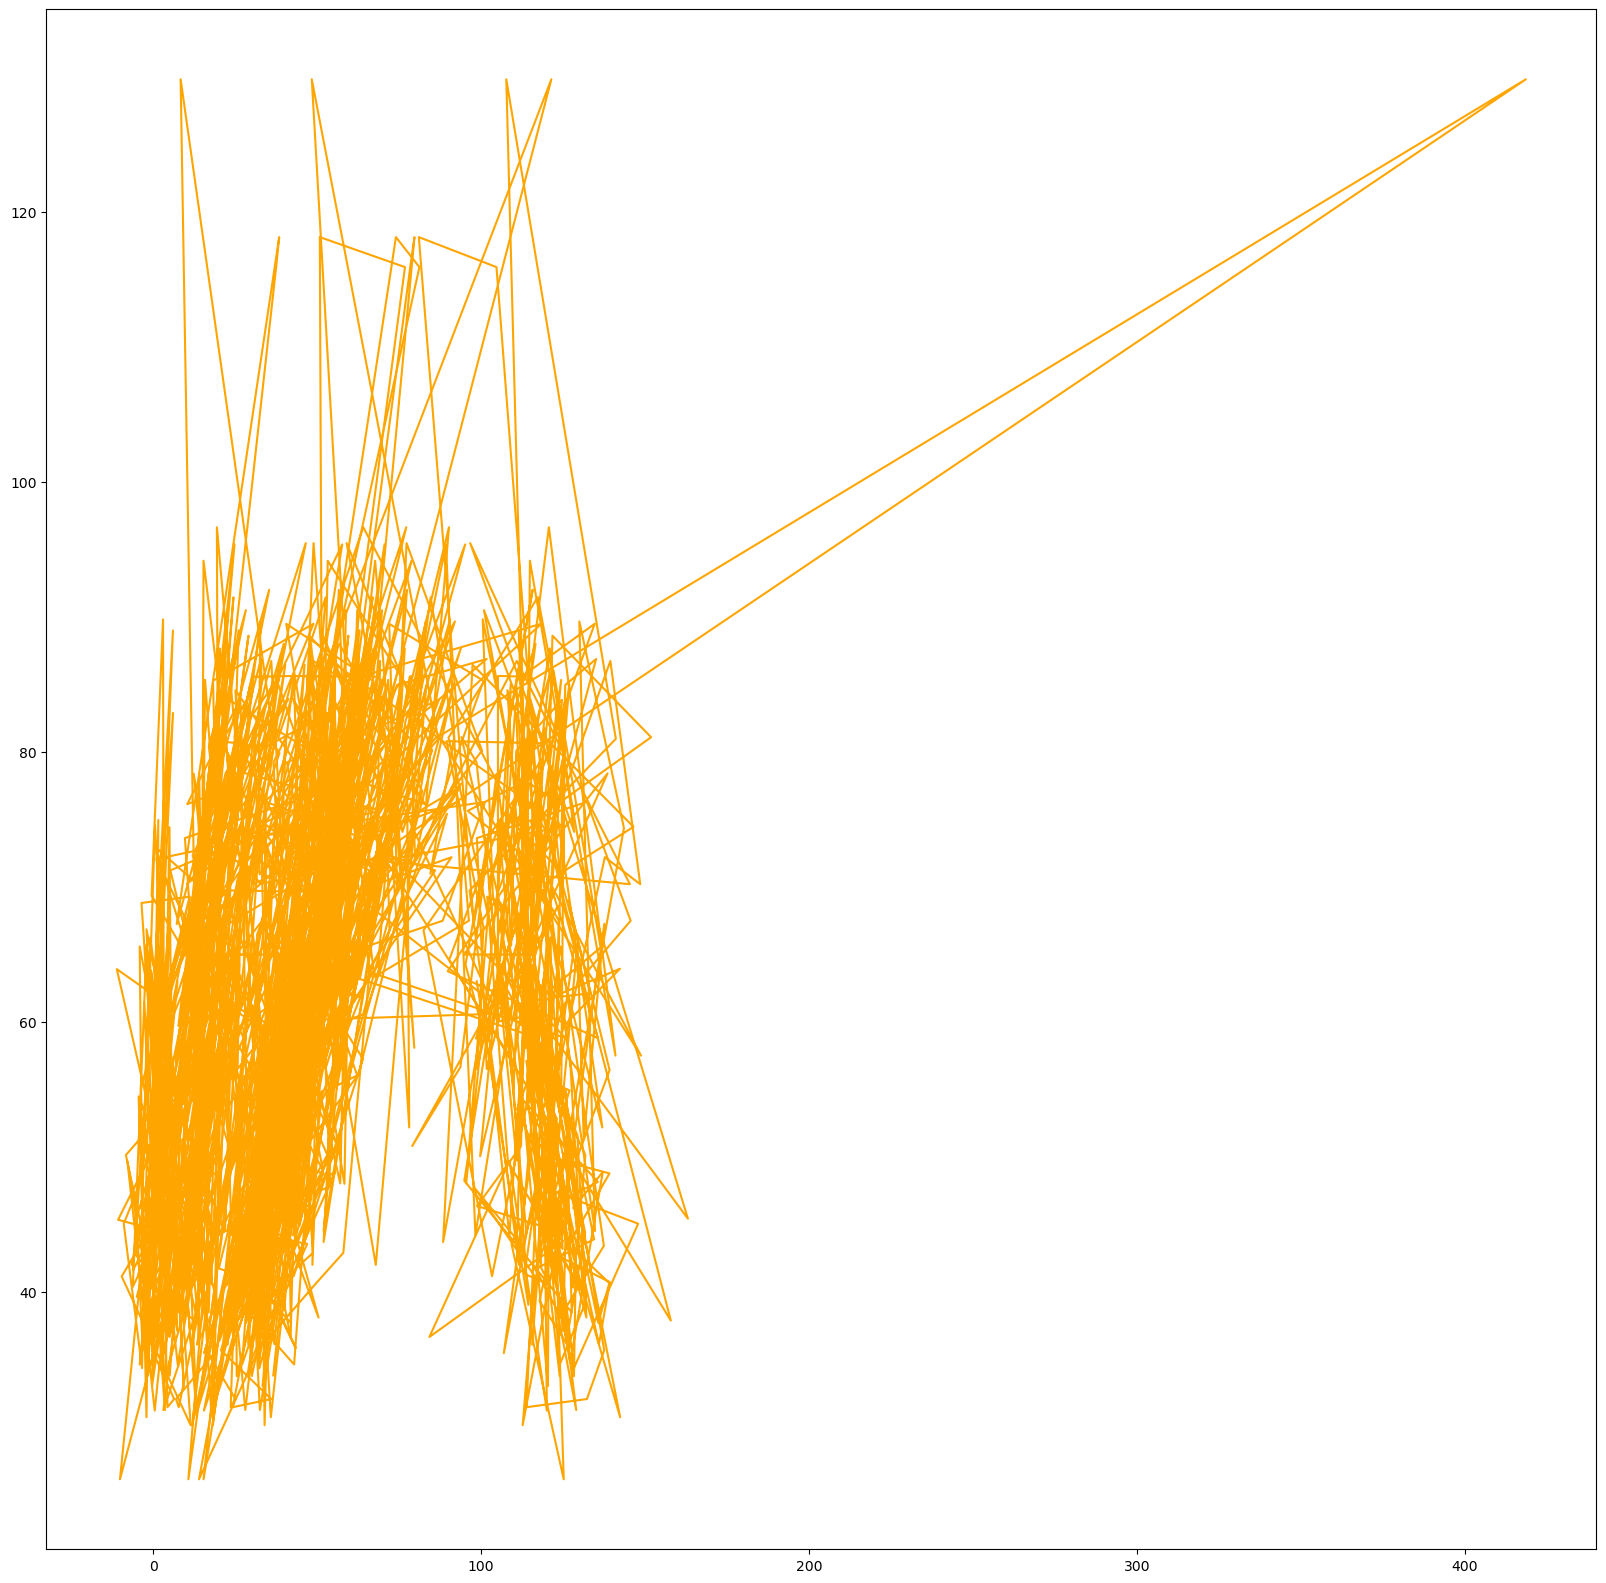

In [9]:
from sklearn.linear_model import LinearRegression
plt.figure(figsize=[20,20])
poly_reg=LinearRegression()
poly_reg.fit(x_polynomial,y)
y_head=poly_reg.predict(x_polynomial)
plt.plot(x,y_head,color="orange")
plt.show()

In [10]:
#%% R^2 score
from sklearn.metrics import r2_score
print("R^2 : ",r2_score(y,y_head))

R^2 :  0.9999999999999954
